📂 Chargement des scénarios...
✅ 3 scénarios chargés avec succès

📊 Création des graphiques...
  ✅ comparaison_temps_attente.png


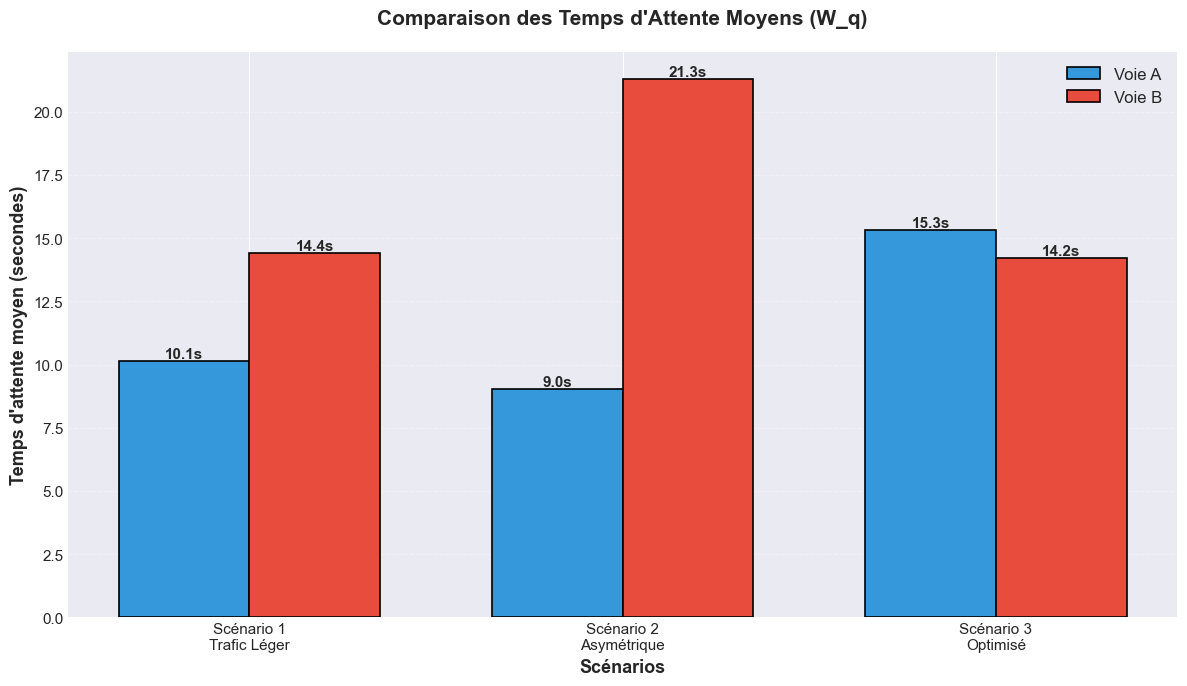

  ✅ comparaison_taux_utilisation.png


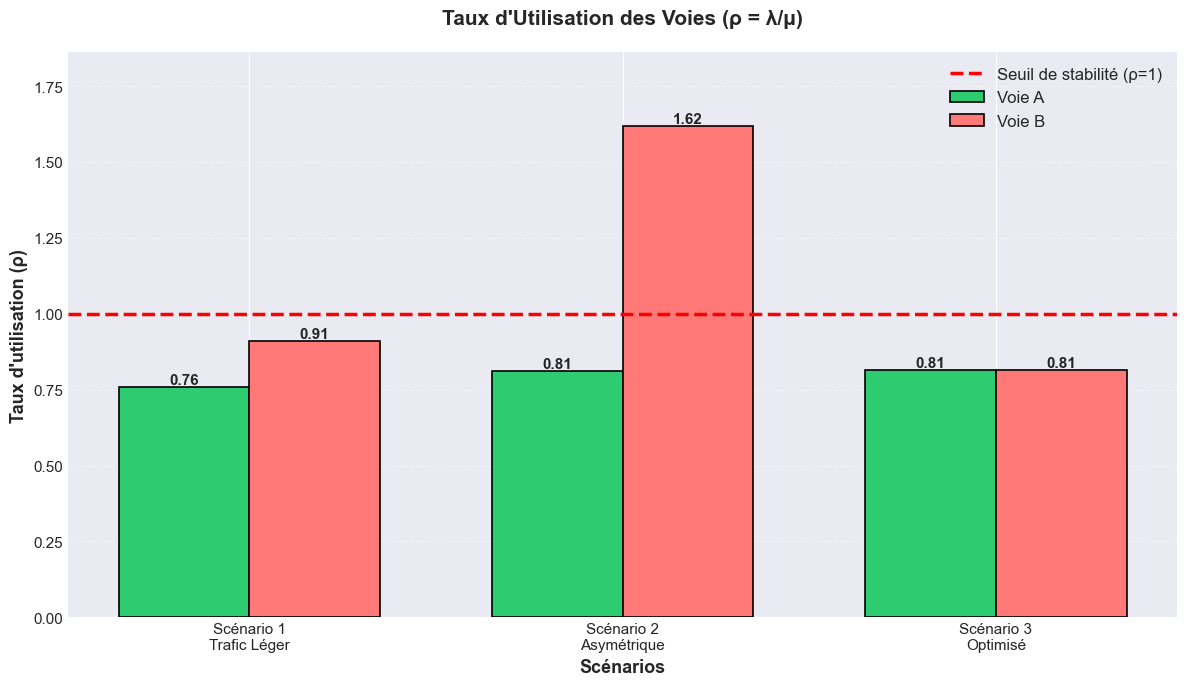

  ✅ theorie_vs_simulation.png


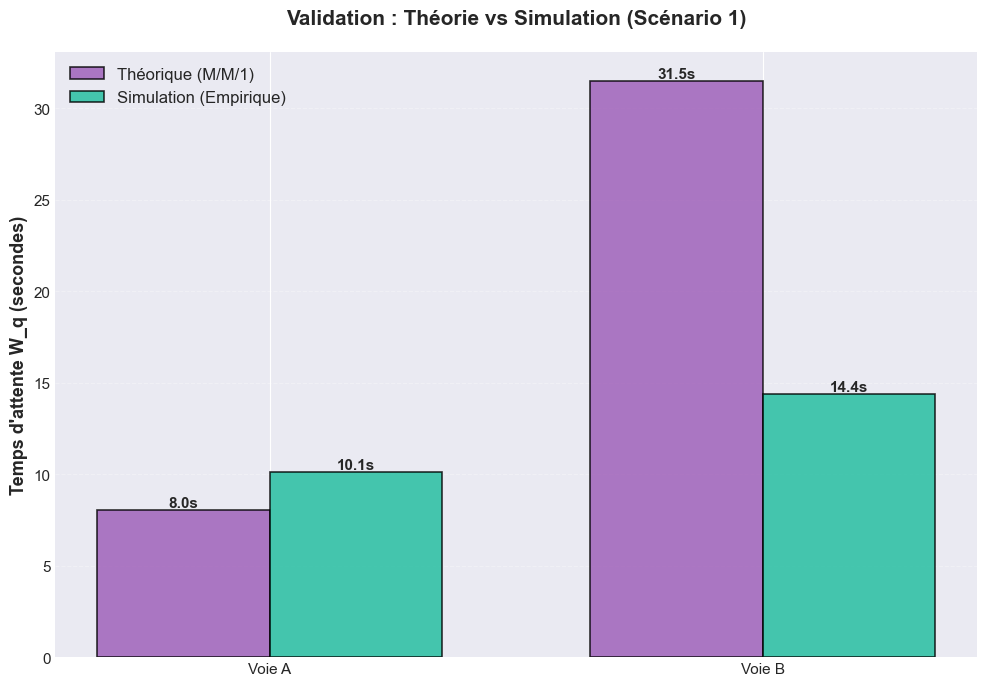

  ✅ vehicules_servis.png


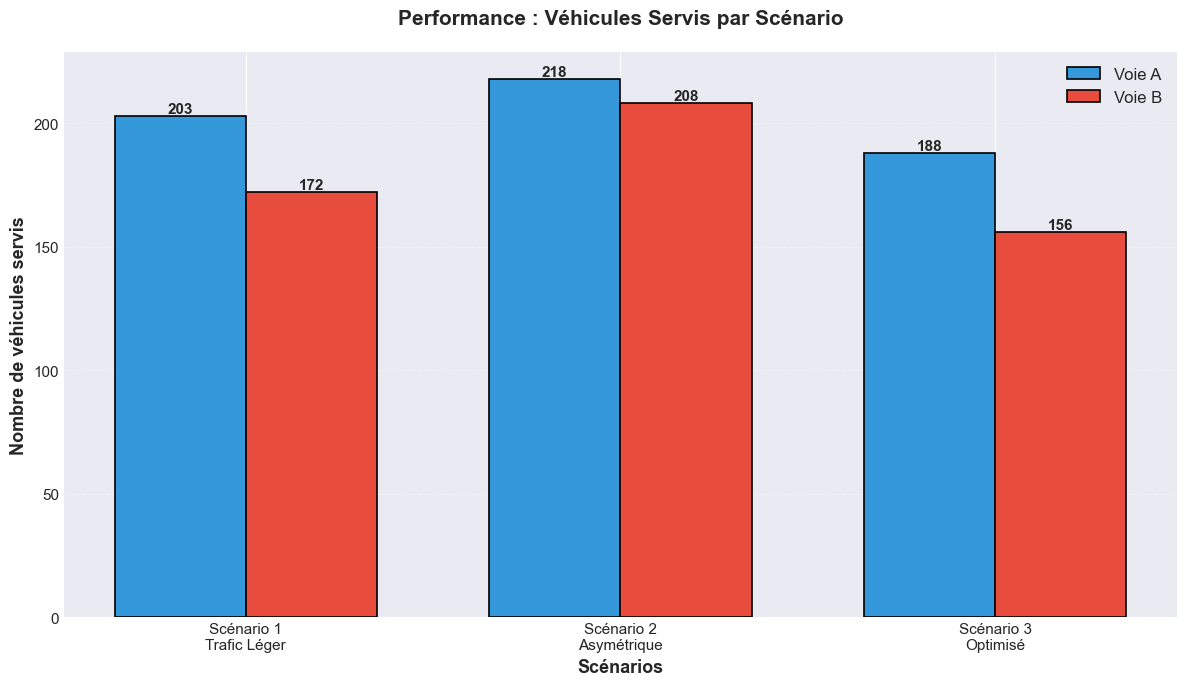


✅ Tous les graphiques créés avec succès !

📋 TABLEAU COMPARATIF DES SCÉNARIOS
  Scénario  λ (véh/s)  T_A (s)  T_B (s)  ρ_A  ρ_B W_q_A (s) W_q_B (s) Stable
Scénario 1        0.3       30       25 0.76 0.91      10.1      14.4      ✅
Scénario 2        0.4       40       20 0.81 1.62       9.0      21.3      ❌
Scénario 3        0.3       28       28 0.81 0.81      15.3      14.2      ✅

✅ Tableau sauvegardé : tableau_comparatif.csv

📐 VALIDATION DU MODÈLE (Écarts Théorie/Simulation)

Scénario 1
Trafic Léger:
  Voie A : Théo=8.02s | Emp=10.14s | Écart=26.4%
  Voie B : Théo=31.51s | Emp=14.39s | Écart=54.3%

Scénario 2
Asymétrique:
  Voie A : Théo=8.63s | Emp=9.05s | Écart=4.8%
  Voie B : Système INSTABLE (ρ > 1)

Scénario 3
Optimisé:
  Voie A : Théo=11.90s | Emp=15.32s | Écart=28.7%
  Voie B : Théo=11.90s | Emp=14.20s | Écart=19.3%


🎉 ANALYSE TERMINÉE AVEC SUCCÈS !


In [4]:
# ANALYSE DES RÉSULTATS - SIMULATION FEUX DE CIRCULATION
# Auteur : Tasnim
# Date : Décembre 2024

import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Configuration graphique professionnelle
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 11

# ============================================
# PARTIE 1 : CHARGEMENT DES DONNÉES
# ============================================

def charger_scenario(nom_fichier):
    """Charge un fichier JSON de résultats"""
    with open(nom_fichier, 'r', encoding='utf-8') as f:
        return json.load(f)

# Charger les 3 scénarios
print("📂 Chargement des scénarios...")
scenario1 = charger_scenario('../sarah_implementation/results/scenario1_trafic_leger.json')
scenario2 = charger_scenario('../sarah_implementation/results/scenario2_asymetrique.json')
scenario3 = charger_scenario('../sarah_implementation/results/scenario3_optimise.json')
print("✅ 3 scénarios chargés avec succès\n")

# ============================================
# PARTIE 2 : EXTRACTION DES DONNÉES
# ============================================

def extraire_donnees(scenario, nom):
    """Extrait les données importantes d'un scénario"""
    return {
        'nom': nom,
        # Paramètres
        'lambda_a': scenario['parametres']['lambda_a'],
        'lambda_b': scenario['parametres']['lambda_b'],
        'mu_a': scenario['parametres']['mu_a'],
        'mu_b': scenario['parametres']['mu_b'],
        'T_A': scenario['parametres']['config_feux']['T_A'],
        'T_B': scenario['parametres']['config_feux']['T_B'],
        # Théorique
        'rho_a_theo': scenario['theorique']['voie_a']['rho'],
        'rho_b_theo': scenario['theorique']['voie_b']['rho'],
        'Wq_a_theo': scenario['theorique']['voie_a']['W_q'],
        'Wq_b_theo': scenario['theorique']['voie_b']['W_q'],
        'stable_a': scenario['theorique']['voie_a']['est_stable'],
        'stable_b': scenario['theorique']['voie_b']['est_stable'],
        # Empirique
        'Wq_a_emp': scenario['empirique']['voie_a']['temps_attente_moyen'],
        'Wq_b_emp': scenario['empirique']['voie_b']['temps_attente_moyen'],
        'servis_a': scenario['empirique']['voie_a']['vehicules_servis'],
        'servis_b': scenario['empirique']['voie_b']['vehicules_servis'],
    }

donnees = [
    extraire_donnees(scenario1, 'Scénario 1\nTrafic Léger'),
    extraire_donnees(scenario2, 'Scénario 2\nAsymétrique'),
    extraire_donnees(scenario3, 'Scénario 3\nOptimisé')
]

# ============================================
# PARTIE 3 : GRAPHIQUES COMPARATIFS
# ============================================

# GRAPHIQUE 1 : Temps d'Attente Moyen
print("📊 Création des graphiques...")

scenarios_labels = [d['nom'] for d in donnees]
temps_attente_a = [d['Wq_a_emp'] for d in donnees]
temps_attente_b = [d['Wq_b_emp'] for d in donnees]

x = np.arange(len(scenarios_labels))
largeur = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
bars1 = ax.bar(x - largeur/2, temps_attente_a, largeur, label='Voie A', 
               color='#3498db', edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x + largeur/2, temps_attente_b, largeur, label='Voie B', 
               color='#e74c3c', edgecolor='black', linewidth=1.2)

# Ajouter les valeurs sur les barres
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}s', ha='center', va='bottom', fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}s', ha='center', va='bottom', fontweight='bold')

ax.set_xlabel('Scénarios', fontsize=13, fontweight='bold')
ax.set_ylabel('Temps d\'attente moyen (secondes)', fontsize=13, fontweight='bold')
ax.set_title('Comparaison des Temps d\'Attente Moyens (W_q)', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(scenarios_labels)
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('figures/comparaison_temps_attente.png', dpi=300, bbox_inches='tight')
print("  ✅ comparaison_temps_attente.png")
plt.show()

# GRAPHIQUE 2 : Taux d'Utilisation (ρ)
rho_a = [d['rho_a_theo'] for d in donnees]
rho_b = [d['rho_b_theo'] for d in donnees]

fig, ax = plt.subplots(figsize=(12, 7))
bars1 = ax.bar(x - largeur/2, rho_a, largeur, label='Voie A', 
               color='#2ecc71', edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x + largeur/2, rho_b, largeur, label='Voie B', 
               color='#ff7979', edgecolor='black', linewidth=1.2)

# Ligne de seuil ρ = 1
ax.axhline(y=1.0, color='red', linestyle='--', linewidth=2.5, 
           label='Seuil de stabilité (ρ=1)', zorder=5)

# Valeurs
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

ax.set_xlabel('Scénarios', fontsize=13, fontweight='bold')
ax.set_ylabel('Taux d\'utilisation (ρ)', fontsize=13, fontweight='bold')
ax.set_title('Taux d\'Utilisation des Voies (ρ = λ/μ)', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(scenarios_labels)
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, max(max(rho_a), max(rho_b)) * 1.15)
plt.tight_layout()
plt.savefig('figures/comparaison_taux_utilisation.png', dpi=300, bbox_inches='tight')
print("  ✅ comparaison_taux_utilisation.png")
plt.show()

# GRAPHIQUE 3 : Théorie vs Simulation (Validation)
categories = ['Voie A', 'Voie B']
theorique = [donnees[0]['Wq_a_theo'], donnees[0]['Wq_b_theo']]
empirique = [donnees[0]['Wq_a_emp'], donnees[0]['Wq_b_emp']]

x_cat = np.arange(len(categories))
fig, ax = plt.subplots(figsize=(10, 7))

bars1 = ax.bar(x_cat - largeur/2, theorique, largeur, 
               label='Théorique (M/M/1)', color='#9b59b6', 
               alpha=0.8, edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x_cat + largeur/2, empirique, largeur, 
               label='Simulation (Empirique)', color='#1abc9c', 
               alpha=0.8, edgecolor='black', linewidth=1.2)

# Valeurs
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}s', ha='center', va='bottom', fontweight='bold')

ax.set_ylabel('Temps d\'attente W_q (secondes)', fontsize=13, fontweight='bold')
ax.set_title('Validation : Théorie vs Simulation (Scénario 1)', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x_cat)
ax.set_xticklabels(categories)
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('figures/theorie_vs_simulation.png', dpi=300, bbox_inches='tight')
print("  ✅ theorie_vs_simulation.png")
plt.show()

# GRAPHIQUE 4 : Véhicules Servis
vehicules_servis_a = [d['servis_a'] for d in donnees]
vehicules_servis_b = [d['servis_b'] for d in donnees]

fig, ax = plt.subplots(figsize=(12, 7))
bars1 = ax.bar(x - largeur/2, vehicules_servis_a, largeur, 
               label='Voie A', color='#3498db', edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x + largeur/2, vehicules_servis_b, largeur, 
               label='Voie B', color='#e74c3c', edgecolor='black', linewidth=1.2)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

ax.set_xlabel('Scénarios', fontsize=13, fontweight='bold')
ax.set_ylabel('Nombre de véhicules servis', fontsize=13, fontweight='bold')
ax.set_title('Performance : Véhicules Servis par Scénario', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(scenarios_labels)
ax.legend(fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('figures/vehicules_servis.png', dpi=300, bbox_inches='tight')
print("  ✅ vehicules_servis.png")
plt.show()

print("\n✅ Tous les graphiques créés avec succès !\n")

# ============================================
# PARTIE 4 : TABLEAU COMPARATIF
# ============================================

tableau_data = {
    'Scénario': ['Scénario 1', 'Scénario 2', 'Scénario 3'],
    'λ (véh/s)': [d['lambda_a'] for d in donnees],
    'T_A (s)': [d['T_A'] for d in donnees],
    'T_B (s)': [d['T_B'] for d in donnees],
    'ρ_A': [f"{d['rho_a_theo']:.2f}" for d in donnees],
    'ρ_B': [f"{d['rho_b_theo']:.2f}" for d in donnees],
    'W_q_A (s)': [f"{d['Wq_a_emp']:.1f}" for d in donnees],
    'W_q_B (s)': [f"{d['Wq_b_emp']:.1f}" for d in donnees],
    'Stable': [
        '✅' if d['stable_a'] and d['stable_b'] else '❌' 
        for d in donnees
    ]
}

df = pd.DataFrame(tableau_data)
print("📋 TABLEAU COMPARATIF DES SCÉNARIOS")
print("=" * 80)
print(df.to_string(index=False))
print("=" * 80)

# Sauvegarder en CSV
df.to_csv('tableau_comparatif.csv', index=False)
print("\n✅ Tableau sauvegardé : tableau_comparatif.csv")

# ============================================
# PARTIE 5 : CALCUL DES ÉCARTS
# ============================================

print("\n📐 VALIDATION DU MODÈLE (Écarts Théorie/Simulation)")
print("=" * 80)

for i, d in enumerate(donnees, 1):
    print(f"\n{d['nom']}:")
    
    if d['Wq_a_theo'] is not None:
        ecart_a = abs(d['Wq_a_emp'] - d['Wq_a_theo']) / d['Wq_a_theo'] * 100
        print(f"  Voie A : Théo={d['Wq_a_theo']:.2f}s | Emp={d['Wq_a_emp']:.2f}s | Écart={ecart_a:.1f}%")
    else:
        print(f"  Voie A : Système INSTABLE (ρ > 1)")
    
    if d['Wq_b_theo'] is not None:
        ecart_b = abs(d['Wq_b_emp'] - d['Wq_b_theo']) / d['Wq_b_theo'] * 100
        print(f"  Voie B : Théo={d['Wq_b_theo']:.2f}s | Emp={d['Wq_b_emp']:.2f}s | Écart={ecart_b:.1f}%")
    else:
        print(f"  Voie B : Système INSTABLE (ρ > 1)")

print("\n" + "=" * 80)
print("\n🎉 ANALYSE TERMINÉE AVEC SUCCÈS !")